In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folie as fl
from mpl_toolkits.mplot3d import Axes3D
import math
from math import *
# %matplotlib widget

# 1) First attempts and ref for plotting 

## 1.1) Python example
 

Let be a function f from ℝ² into ℝ. For any couple (x, y) in ℝ² :

In [2]:
def f(x, y):
    return 2*x**2 - x*y + 2*y**2

We choose a range of values from the set of real numbers ℝ for x and y (I will take for the example [-100, 100] with 100 values for each variable).

In [3]:
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
# n create an array of values containing all value pairs (xi, yi) for xi in x, and yi in y.
X, Y = np.meshgrid(x, y)  
# compute the values of our function defined above for each pair of values (xi, yi) and store these values in a new variable Z :
Z = f(X,Y)

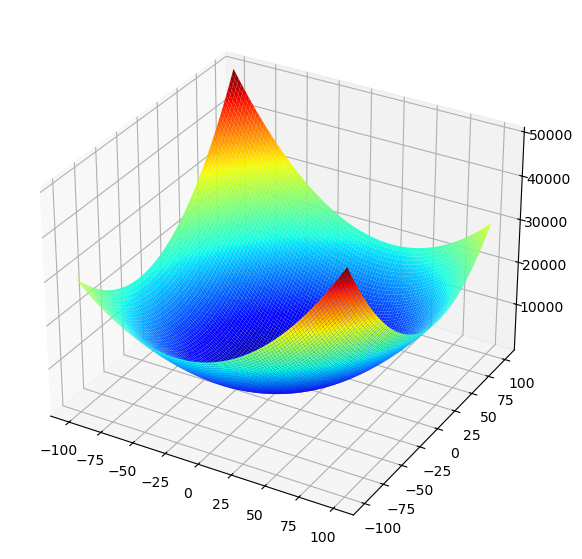

In [4]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')


## 1.2) 1D quadratic potential (Folie)

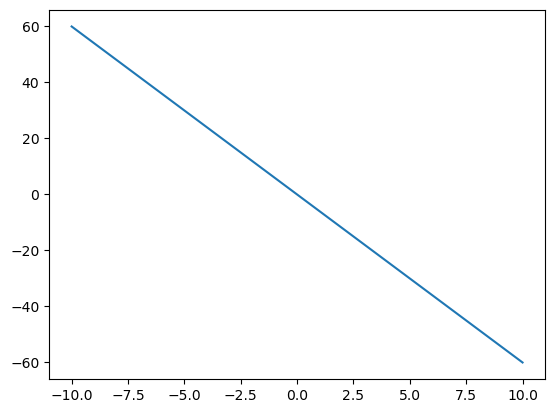

In [5]:
abscissa=np.array(np.linspace(-10,10,200))
diff_function= fl.functions.Polynomial(deg=0,coefficients=np.asarray([0.5]))
linear_force= fl.functions.Quadratic(a=6)
plt.plot(abscissa,linear_force.force(abscissa))

In [6]:
model_simu = fl.models.overdamped.Overdamped(linear_force,diffusion=diff_function)
simulator = fl.simulations.Simulator(fl.simulations.EulerStepper(model_simu), 1e-3)#k=5.0, xstop=6.0)

In [7]:
print(linear_force.force.domain.dim)

AttributeError: 'function' object has no attribute 'domain'

In [ ]:
print(linear_force.domain.dim)

1


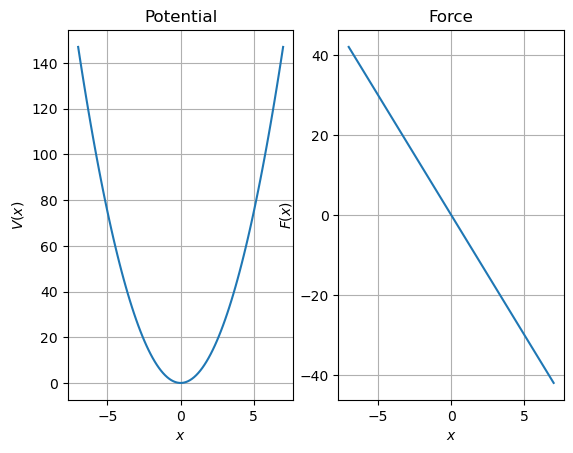

In [ ]:
# Plot of Free Energy and Force
x_values = np.linspace(-7, 7, 100)
fig, axs = plt.subplots(1, 2)
axs[0].plot(x_values,linear_force.amended_potential(x_values.reshape(len(x_values))))
axs[1].plot(x_values,linear_force.force(x_values.reshape(len(x_values))))
axs[0].set_title("Potential")
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$V(x)$")
axs[0].grid()
axs[1].set_title("Force") 
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$F(x)$") 
axs[1].grid()

In [ ]:
ntraj=50
q0= np.empty(ntraj)
for i in range(len(q0)):
    q0[i]=-6
# Calculate Trajectory
time_steps=5000
data = simulator.run(time_steps, q0, save_every=1)
xmax = np.concatenate(simulator.xmax_hist, axis=1).T

# Plot the resulting trajectories
# sphinx_gallery_thumbnail_number = 1
fig, axs = plt.subplots(1,2)
for n, trj in enumerate(data):
    axs[0].plot(trj["x"])
    axs[1].plot(xmax[:, n])
    axs[1].set_xlabel("$timestep$")
    axs[1].set_ylabel("$x(t)$")
    axs[1].grid()

TypeError: 'NoneType' object is not callable

# 2) 2D quartic potential 

### Implementation with folie

In [ ]:
# x = np.array(np.linspace(2, 4, 5))
# y = np.array(np.linspace(-1, 1, 5))
# # n create an array of values containing all value pairs (xi, yi) for xi in x, and yi in y.
# X, Y = np.meshgrid(x, y)  
# # compute the values of our function defined above for each pair of values (xi, yi) and store these values in a new variable Z : 
# input=np.vstack((x,y))

In [ ]:
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)
input=np.transpose(np.array([x,y]))
# input[:,1] 
diff_function= fl.functions.Polynomial(deg=0,coefficients=np.asarray([0.5]))
quartic= fl.functions.Quartic2D(a=6.0,b=4.0)
pot=quartic.potential(input)
ff=quartic.force(input) # returns x and y components of the force : x_comp =ff[:,0] , y_comp =ff[:,1]


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot(x,y, pot)#, rstride=1, cstride=1,cmap='viridis', edgecolor = 'none')

TypeError: Axes3D.plot_surface() missing 1 required positional argument: 'Z'

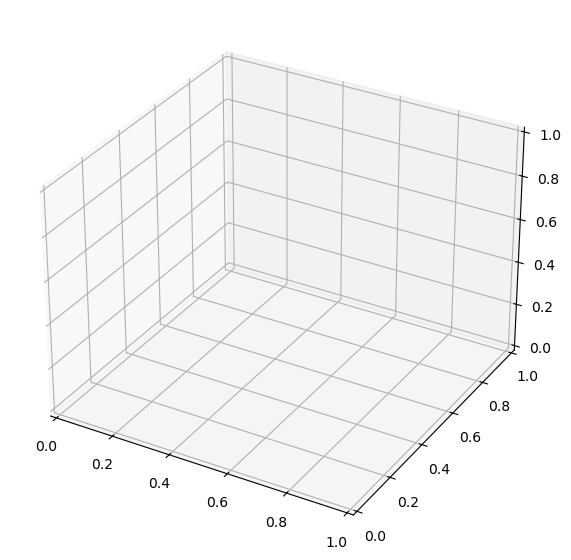

In [ ]:
Z=pot
# essai de plotter le potentiel
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(np.meshgrid(x,y), pot, rstride=1, cstride=1,cmap='viridis', edgecolor = 'none')

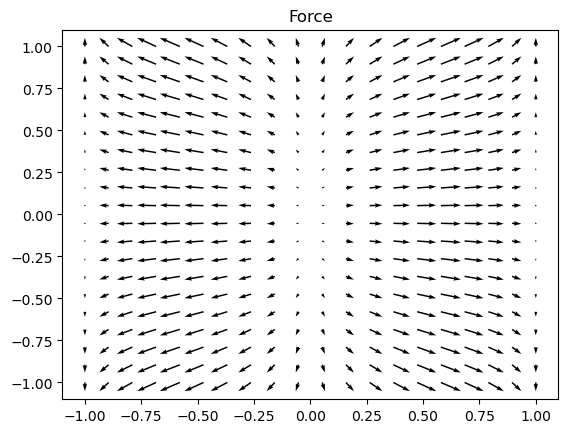

In [ ]:

U,V = np.meshgrid(ff[:,0],ff[:,1])
# print(X.shape)
fig, ax =plt.subplots()
ax.quiver(x,y,U,V)
ax.set_title('Force')
# 
plt.show()

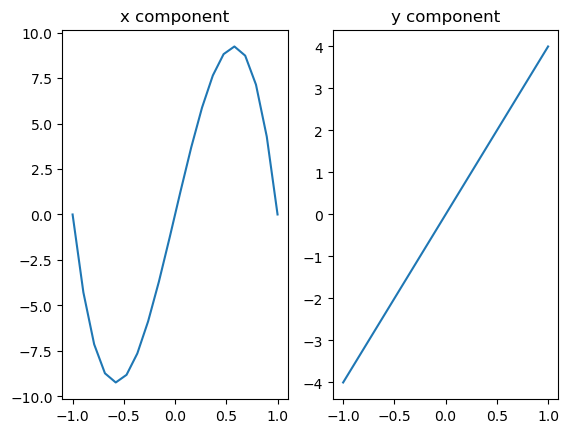

In [ ]:

fig, ax =plt.subplots(1,2)
ax[0].plot(x,ff[:,0])
ax[1].plot(y,ff[:,1])
ax[0].set_title('x component')
ax[1].set_title('y component')
plt.show()
# print(np.arange(len(ff[0])))
# plt.show()

In [ ]:
model_simu=fl.models.overdamped.Overdamped(force=quartic,diffusion=diff_function)
# simulator=fl.simulations.Simulator(fl.simulations.EulerStepper(model_simu), 1e-3)

In [ ]:
c=np.array([0,1,2,3,4])
b=np.array([5,6,7,8,9])
d=np.vstack((c,b)).T
print(d)
e=np.zeros(d.shape)
e[:,0]
# np.zeros((2, 2))

[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


array([0., 0., 0., 0., 0.])

In [ ]:
"""l= X, Y
j=np.asarray(l)
j[1]
input=np.transpose(input)
input
z=quartic.potential(j)"""

'l= X, Y\nj=np.asarray(l)\nj[1]\ninput=np.transpose(input)\ninput\nz=quartic.potential(j)'

In [ ]:
"""fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y,Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')"""

"fig = plt.figure(figsize=(10,7))\nax = plt.axes(projection='3d')\nax.plot_surface(X, Y,Z, rstride=1, cstride=1,cmap='jet', edgecolor = 'none')"

### My Implementation

In [ ]:
x = np.linspace(-1.5,1.5,40)
y = np.linspace(-2,2,40)
# n create an array of values containing all value pairs (xi, yi) for xi in x, and yi in y.
X, Y = np.meshgrid(x, y)  
# compute the values of our function defined above for each pair of values (xi, yi) and store these values in a new variable Z : 
input=np.vstack((x,y))

In [ ]:
diff_function= fl.functions.Polynomial(deg=0,coefficients=np.asarray([0.5]))
my_quartic= fl.functions.other_potentials.My_Quartic2D(a=1,dim=2)
pp=my_quartic.potential(X,Y)
Z= pp

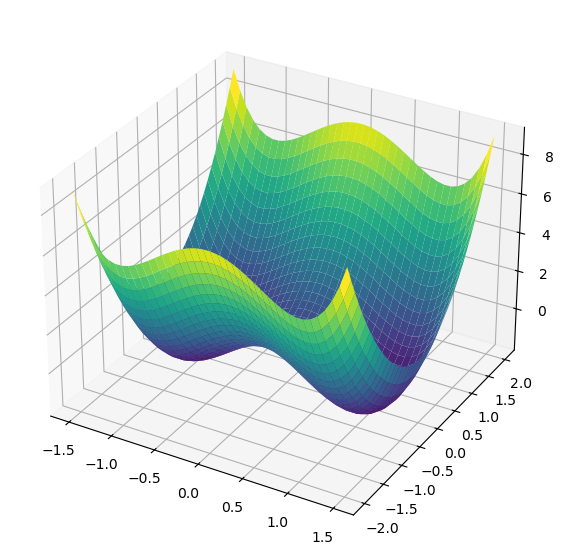

In [ ]:

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor = 'none')

(40, 40)


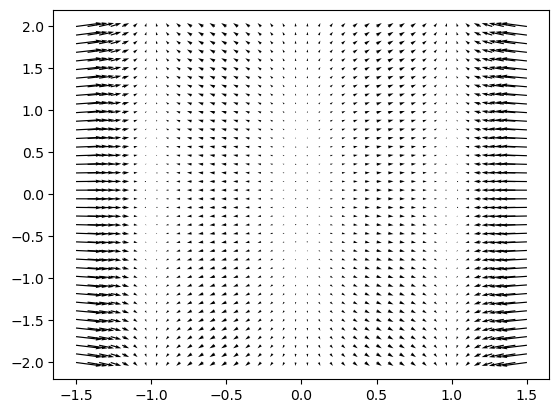

In [ ]:
u = my_quartic.force_x_comp(x)
v = my_quartic.force_y_comp(y)
U,V = np.meshgrid(u,y)
print(X.shape)
fig, ax =plt.subplots()
ax.quiver(x,y,U,V)
# 
plt.show()